In [35]:
from typing import Tuple

import torch
from torch import nn
from torch.nn import functional as F
import matplotlib.pyplot as plt
from typing import Tuple
class SoftPositionEmbed(nn.Module):
    def __init__(self, num_channels: int, hidden_size: int, resolution: Tuple[int, int]):
        super().__init__()
        self.dense = nn.Linear(in_features=num_channels + 1, out_features=hidden_size)
        self.register_buffer("grid", build_grid(resolution))

    def forward(self, inputs):
        emb_proj = self.dense(self.grid).permute(0, 3, 1, 2)
        assert_shape(inputs.shape[1:], emb_proj.shape[1:])
        return inputs + emb_proj



def assert_shape(actual, expected: Tuple[int, ...], message: str = ""):
    assert actual == expected, f"Expected shape: {expected} but passed shape: {actual}. {message}"


def build_grid(resolution):
    ranges = [torch.linspace(0.0, 1.0, steps=res) for res in resolution]
    grid = torch.meshgrid(*ranges)
    grid = torch.stack(grid, dim=-1)
    grid = torch.reshape(grid, [resolution[0], resolution[1], -1])
    grid = grid.unsqueeze(0)
    return torch.cat([grid, 1.0 - grid], dim=-1)#grid#

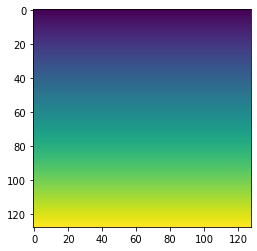

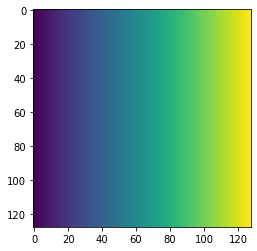

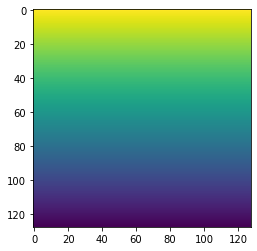

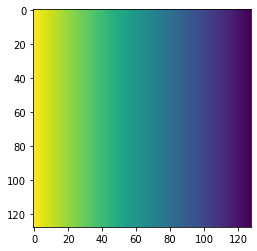

In [36]:
num_channels = 3
hidden_size = 64
resolution = (128,128)
grid = build_grid(resolution)
grid.shape



for i in range(4):
    plt.imshow(grid[0,:,:,i])
    plt.show()

In [37]:
soft_pos = SoftPositionEmbed(num_channels = num_channels,hidden_size = hidden_size, resolution=resolution )

In [38]:
a = soft_pos.dense(grid).detach().numpy()

In [39]:
a

array([[[[-0.9095657 ,  0.39260823,  0.9221774 , ..., -0.7463458 ,
           0.9081492 , -0.17263228],
         [-0.9040062 ,  0.39184853,  0.91454095, ..., -0.7419715 ,
           0.9092847 , -0.17403404],
         [-0.89844674,  0.39108884,  0.90690446, ..., -0.7375971 ,
           0.91042024, -0.17543584],
         ...,
         [-0.21463038,  0.297647  , -0.03237957, ..., -0.19955176,
           1.0500891 , -0.34785444],
         [-0.20907089,  0.2968873 , -0.04001603, ..., -0.1951774 ,
           1.0512247 , -0.34925622],
         [-0.20351142,  0.29612762, -0.04765248, ..., -0.19080305,
           1.0523602 , -0.350658  ]],

        [[-0.9104969 ,  0.3964034 ,  0.9230703 , ..., -0.7439844 ,
           0.9032906 , -0.17425254],
         [-0.9049374 ,  0.39564374,  0.9154339 , ..., -0.73961   ,
           0.90442616, -0.17565432],
         [-0.89937794,  0.39488405,  0.9077974 , ..., -0.7352357 ,
           0.9055617 , -0.1770561 ],
         ...,
         [-0.2155616 ,  0.30144218

In [28]:
a

torch.Size([1, 128, 128, 64])